# AIRBNB Advisor - Data Preprocessing & Statistics


### About
CSV files from <a href="http://insideairbnb.com/get-the-data.html">insideairbnb.com</a> have to be preprocessed as they are frequently updated with new reservation informations.
<br/>
The following is an example of this process using Amsterdam data

### Dataset ~ listings.csv and calendar.csv

This dataset consists of sales prices of houses in Ames, Iowa.

The training dataset has 1460 instances with unique Ids, sales prices, and 79 more features.

## Step 1: Concatening the calendar.csv files

The data that we use is updated ~every month. It means that some of the properties that were not rented may now be rented. Due to that fact, we have to update our dataset (here superCsv) with the new data. Here is the function that does that with an example

In [99]:
import pandas as pd
import seaborn as sns

pd.set_option('display.max_columns', 50)

def addToSuperCsv(superCsv, csvToAdd):
    print('Before Cutting SuperCsv goes to : ' + max(superCsv['date']))
    keepUpTo = min(csvToAdd['date'])
    print('CsvToAdd starts at : ' + keepUpTo)
    superCsv = superCsv[superCsv['date'] < keepUpTo]
    print('After Cutting SuperCsv goes to : ' + max(superCsv['date']))
    superCsv = pd.concat([superCsv, csvToAdd])
    print('After Concatenation SuperCsv goes to : ' + max(superCsv['date']))
    return superCsv

superCsv = pd.read_csv('07_04_calendar.csv') # Need to download the Super Calendar from S3
csvToAdd = pd.read_csv('10_05_calendar.csv')
superCsv = addToSuperCsv(superCsv, csvToAdd)
superCsv.tail(5)

Before Cutting SuperCsv goes to : 2019-04-07
CsvToAdd starts at : 2018-05-10
After Cutting SuperCsv goes to : 2018-05-09
After Concatenation SuperCsv goes to : 2019-05-10


,listing_id,date,available,price
6843745,21091463,2018-05-14,t,$100.00
6843746,21091463,2018-05-13,t,$100.00
6843747,21091463,2018-05-12,f,NaN
6843748,21091463,2018-05-11,f,NaN
6843749,21091463,2018-05-10,f,NaN


## Step 2: The listings.csv file

The listings.csv files needs to be preprocessed as it contains useless & malformated data.

### Step 2.1
Below is the selection of the useful data :

In [117]:
listingsList = pd.read_csv('listings.csv')
# keeping is simpler than dropping since we have a lot of useless features
listingsList = listingsList[['id','host_name','host_since',
                             'host_is_superhost','host_total_listings_count','host_has_profile_pic',
                             'host_identity_verified','latitude','longitude',
                             'property_type','room_type','bathrooms','bedrooms','beds','bed_type',
                             'price','guests_included','minimum_nights',
                             'maximum_nights','review_scores_rating','review_scores_accuracy',
                             'review_scores_cleanliness','review_scores_checkin',
                             'review_scores_communication','review_scores_location','review_scores_value']]
listingsList.head(3)

,id,host_name,host_since,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,room_type,bathrooms,bedrooms,beds,bed_type,price,guests_included,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,4402514,Ara,2014-10-18,f,1.0,t,f,52.320754,4.975741,Apartment,Entire home/apt,1.0,2.0,2.0,Real Bed,$80.00,1,30,90,94.0,10.0,10.0,10.0,10.0,8.0,10.0
1,21173167,Laura,2014-08-26,t,5.0,t,t,52.320224,4.960554,House,Entire home/apt,1.5,5.0,10.0,Real Bed,$236.00,7,5,1125,100.0,10.0,10.0,10.0,10.0,9.0,10.0
2,24236405,Maria,2016-08-19,f,11.0,t,f,52.323945,4.961364,Apartment,Entire home/apt,1.0,1.0,3.0,Real Bed,$120.00,1,1,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Step 2.2
Now that we have our data we need to arrange a few things

In [118]:
# handling boolean values
listingsList['host_is_superhost'] = listingsList['host_is_superhost'].replace({"t": True, "f": False})
listingsList['host_has_profile_pic'] = listingsList['host_has_profile_pic'].replace({"t": True, "f": False})
listingsList['host_identity_verified'] = listingsList['host_identity_verified'].replace({"t": True, "f": False})

# simplifying some values
listingsList['room_type'] = listingsList['room_type'].replace({"Entire home/apt": "Entire", "Private room": "Room", "Shared room": "Shared"})
listingsList['bed_type'] = listingsList['bed_type'].replace({"Real Bed": "Bed", "Pull-out Sofa": "Sofa"})

# converting price to number
listingsList['price'] = listingsList['price'].str[1:]
listingsList['price'] = listingsList['price'].str.replace(',', '')
listingsList['price'] = listingsList['price'].astype(float)

listingsList.head(3)

,id,host_name,host_since,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,room_type,bathrooms,bedrooms,beds,bed_type,price,guests_included,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,4402514,Ara,2014-10-18,False,1.0,True,False,52.320754,4.975741,Apartment,Entire,1.0,2.0,2.0,Bed,80.0,1,30,90,94.0,10.0,10.0,10.0,10.0,8.0,10.0
1,21173167,Laura,2014-08-26,True,5.0,True,True,52.320224,4.960554,House,Entire,1.5,5.0,10.0,Bed,236.0,7,5,1125,100.0,10.0,10.0,10.0,10.0,9.0,10.0
2,24236405,Maria,2016-08-19,False,11.0,True,False,52.323945,4.961364,Apartment,Entire,1.0,1.0,3.0,Bed,120.0,1,1,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Step 2.3
Let's now deal with the null values

In [119]:
listingsList.isnull().sum()

id                                0
host_name                        21
host_since                       21
host_is_superhost                21
host_total_listings_count        21
host_has_profile_pic             21
host_identity_verified           21
latitude                          0
longitude                         0
property_type                     0
room_type                         0
bathrooms                        10
bedrooms                          7
beds                              7
bed_type                          0
price                             0
guests_included                   0
minimum_nights                    0
maximum_nights                    0
review_scores_rating           2634
review_scores_accuracy         2651
review_scores_cleanliness      2647
review_scores_checkin          2671
review_scores_communication    2651
review_scores_location         2670
review_scores_value            2672
dtype: int64

In [120]:
# replacing the reviews null scores by the means
listingsList["review_scores_rating"].fillna(listingsList["review_scores_rating"].mean(skipna=True), inplace=True)
listingsList["review_scores_accuracy"].fillna(listingsList["review_scores_accuracy"].mean(skipna=True), inplace=True)
listingsList["review_scores_cleanliness"].fillna(listingsList["review_scores_cleanliness"].mean(skipna=True), inplace=True)
listingsList["review_scores_checkin"].fillna(listingsList["review_scores_checkin"].mean(skipna=True), inplace=True)
listingsList["review_scores_communication"].fillna(listingsList["review_scores_communication"].mean(skipna=True), inplace=True)
listingsList["review_scores_location"].fillna(listingsList["review_scores_location"].mean(skipna=True), inplace=True)
listingsList["review_scores_value"].fillna(listingsList["review_scores_value"].mean(skipna=True), inplace=True)

# dropping the lines with no informations on the host, only 21 as they are the same
listingsList = listingsList.drop(listingsList.loc[listingsList['host_name'].isnull()].index)


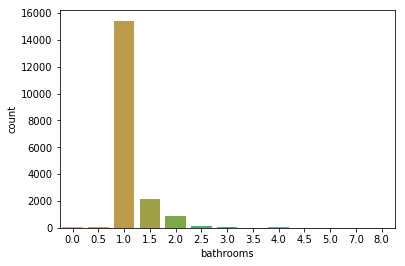

In [121]:
# replacing the bathrooms null values by the most common value
sns.countplot(x='bathrooms',data=listingsList)
listingsList["bathrooms"].fillna(1.0, inplace=True)

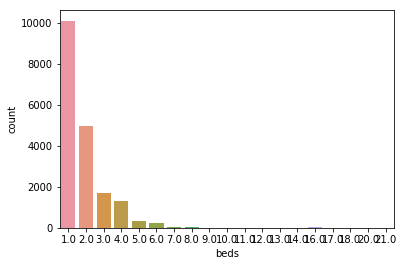

In [122]:
# replacing the beds null values by the most common value
sns.countplot(x='beds',data=listingsList)
listingsList["beds"].fillna(1.0, inplace=True)

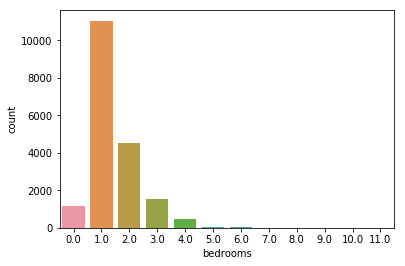

In [123]:
# replacing the bedrooms null values by the most common value
sns.countplot(x='bedrooms',data=listingsList)
listingsList["bedrooms"].fillna(1.0, inplace=True)

In [124]:
listingsList.isnull().sum()

id                             0
host_name                      0
host_since                     0
host_is_superhost              0
host_total_listings_count      0
host_has_profile_pic           0
host_identity_verified         0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
bathrooms                      0
bedrooms                       0
beds                           0
bed_type                       0
price                          0
guests_included                0
minimum_nights                 0
maximum_nights                 0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
dtype: int64

### Step 3.3
Using <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html">sklearn.metrics.mean_squared_error</a> to
evaluate the predicted target values by computing "Root Mean Squred Error (RMSE)":
<ol>
   <li>Import mean_squared_error from sklearn.metrics module.</li>
   <li>Compute the mean squared error (MSE) by using mean_squared_error() function on the validation target data (i.e. Y_valid) and the predicted target values.</li>
   <li>Compute the RMSE by otaining the square-root of the MSE using <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.sqrt.html">numpy.sqrt()</a> function.</li>
   <li>Print the RMSE</li>
</ol>

In [ ]:
# Put your statements here



### Step 3.4
Explore the validation target values vs the predicted target values using scatter function 
(<a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html">matplotlib.pyplot.scatter</a>) of matplotlib library.

In [ ]:
# Put your statements here



<span style="color:red">What is your observation?</span> (Write your observation here.)


## Step 4: Training the Decision Tree model using  Sklearn (10 points)

Using the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html">sklearn.tree.DecisionTreeRegressor</a> to build a Decision Tree model for Regression Problem.

(Reference:<a href="https://scikit-learn.org/stable/modules/tree.html#tree">Decision Tree User Guide from Scikit-learn</a>)

### Step 4.1 
Import the DecisionTreeRegressor from sklearn.tree.

In [ ]:
# Put your statements here



### Step 4.2 
Build the Decision Tree model by:
<ol>
<li>Initialize a Decision Tree model by DecisionTreeRegressor() function.</li>
<li>Call fit() function to train the model using the training feature data (i.e. X_train).</li>
<li>Predict the target values for the validation feature data (i.e. X_valid) using the predict() function.
</ol>

In [ ]:
# Put your statements here



### Step 4.3
Using <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html">sklearn.metrics.mean_squared_error</a> to
evaluate the predicted target values by computing "Root Mean Squred Error (RMSE)":
<ol>
   <li>Import mean_squared_error from sklearn.metrics module,</li>
   <li>Compute the mean squared error (MSE) by using mean_squared_error() function on the validation target data (i.e. Y_valid) and the predicted target values.</li>
   <li>Compute the RMSE by otaining the square-root of the MSE using <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.sqrt.html">numpy.sqrt()</a> function.</li>
   <li>Print the RMSE.</li>
</ol>

In [ ]:
# Put your statements here



## Step 5 -- Standardization and Rescaling (10 points)

Rescaling and Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn.
They might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

(Reference: <a href="https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling">here</a>)

Performs the rescaling by:
<ol>
<li>Import the MinMaxScaler from sklearn.preprocessing module.</li>
<li>Initializing a MinMaxScaler by using <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html">sklearn.preprocessing.MinMaxScaler</a> function, which transforms the numerical features by scaling each feature to a given range of [0, 1], i.e. between zero to one.</li>
<li>Compute the minimum and maximum to be used for later scalingby using <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler.fit">sklearn.preprocessing.MinMaxScaler.fit()</a> function.</li>
<li>Transform the data using <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler.transform">sklearn.preprocessing.MinMaxScaler.transform()</a> function.</li>
<li>The tranformed data is an numpy array. Convert it into a pandas.DataFrame using
pandas.DataFrame() function with pandas.DataFrame.columns.</li>
<li>Using the pandas.DataFrame.head() function to preview the data.</li>
</ol>

In [ ]:
# Put your statements here



Review the first 10 rows of the training feature set using pandas.DataFrame.head().

In [ ]:
# Put your statement here



Review the first 10 rows of the standardized validation feature set using pandas.DataFrame.head().

In [ ]:
# Put your statement here



## Step 6: Training the Neural Network model using Keras (15 points)

### Step 6.1
Import the following libraries using import statements.
<ul>
    <li>keras (for deep learning) (Reference: <url>https://keras.io/</url>)
        <ul>
            <li>Sequential from keras.models</li>
            <li>Dense from keras.layers</li>
            <li>ModelCheckpoint from keras.callbacks</li>
        </ul>
    </li>    
</ul>
Note: Run a code cell by clicking on the cell and using the keyboard shortcut &lt;Shift&gt; + &lt;Enter&gt;.
<br />
Note: Tensorflow and Keras have to be installed first, see <strong>Step 0.1</strong>

In [ ]:
# Put your statements here



### Step 6.2
- Build a neural network to learn from the given training set - trainData.
(Reference: <a href="https://faroit.github.io/keras-docs/1.0.1/getting-started/sequential-model-guide/">Here</a>)
<ol>
  <li>Initalizing a neural network using Sequential() function and name the returned object NN.</li>
  <li>Adding the input layer and the hidden layer using add function of NN and Dense function.<br/>
      Parameters of Dense function:
      <ul>
          <li>Set output_dim to 150: output_dim is the number of nodes we want to add to this layer.</li>
          <li>kernel_initializer to 'normal': kernel_initializer is the initializer for the kernel weights matrix.</li>
          <li>activation to 'relu': activation is the activation function of the node.</li>
          <li>input_dim to the number of features: input_dim refers to the number of inputs, which is only needed for the first layer.<br />
          You may use the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html">pandas.DataFrame.shape</a> function.
          </li>
      </ul>
  </li>
  <li>Adding the output layer using add function of NN and Dense function.<br/>
      Parameters of Dense function:
      <ul>
          <li>Set output_dim to 1: output_dim is the number of nodes we want to add to this layer.</li>
          <li>init to 'relu': init is the initialization of stochastic gradient decent.</li>
          <li>activation to 'normal': activation is the activation function of the node.</li>
      </ul>
  </li>
  <li>Prints a summary representation of our model by calling summary function of NN.</li>
</ol>

In [ ]:
# Put your statements here



### Step 6.3
- Compile the neural network and start training
<ol>
  <li>Call <a href="https://keras.io/models/sequential/#compile">compile()</a> function of NN to compile the neural network<br/>
      Parameters of compile function:
      <ul>
          <li>loss to 'mean_squared_error': loss is a stochastic gradient decent depends on loss.</li>
          <li>optimizer to 'Adam': optimizer is the algorithm that we want to use to find optimal set of weights. For details about 'Adam', please visit <a href="https://arxiv.org/abs/1412.6980v8">here</a>.              
          </li>
          <li>metrics to ['mean_squared_error']: metrics is the metric(s) that we want to use to improve the performance of our neural network. In our case, accuracy is the metrics.</li>
      </ul>
  </li>
  <li>Call <a href="https://keras.io/models/sequential/#fit">fit()</a> function of NN to train the model on training data<br/>
      Parameters of fit function:
      <ul>
          <li>Set x to X: x is the numpy array of training feature data.</li>
          <li>Set y to Y: y is the numpy array of training target data.</li>
          <li>Set batch_size to 32: batch_size is the number of samples per gradient update.</li>
          <li>Set epochs to 500: epochs is the number of epochs to train the model.</li>
      </ul>
  </li>
</ol>

In [ ]:
# Put your statements here



### Step 6.4 
Evaluate the model with Validation dataset

<ol>
<li>Evaluate the model with the validation data using the <a href="https://keras.io/models/sequential/#evaluate">evaluate()</a> function.
The evaluate function returns the loss value and metrics values for the model in test mode.
</li>
<li>Compute the RMSE by otaining the square-root of the MSE using <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.sqrt.html">numpy.sqrt()</a> function.</li>
<li>Print the RMSE.</li>
</ol>

In [ ]:
# Put your statements here



## Step 7: Predict the testing data (20 points)

### Step 7.1  Load the testing data (house-test.csv)

In [ ]:
# Put your statement here



### Step 7.2: Prepare the testing data

Steps for preprocessing the testing data:
<ol>
<li>Exploring the features.</li>
<li>Cleaning data: Handling missing values</li>
<li><del>Creating new features and </del>dropping redundant features.</li>
<li>Transforming data.</li>
</ol>

You may refer to Assignment 1 and also Step 1 above for reference.
(You may add multiple cells below.)

#### Step 7.2.1
Evaluate the data quality & perform missing values assessment using isnull function (<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html">pandas.isnull</a>) and sum function (<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html">pandas.DataFrame.sum</a>) of pandas library.

In [ ]:
# Put your statements here



#### Step 7.2.2 Handling Not Really NA Values

In [ ]:
# Put your statements here



#### Step 7.2.3 Use mean / median to impute the missing values of the features

In [ ]:
# Put your statements here



#### Step 7.2.4 Use the most common values to impute the missing values of the features features

In [ ]:
# Put your statements here, you may add more code cells and markup cells if necessory



#### Step 7.2.5: Drop a certain instance with missing value if necessary

In [ ]:
# Put your statements here



#### Step 7.2.6: Drop certain features if necessary

In [ ]:
# Put your statements here



#### Step 7.2.7: Change the type of certain feature(s) if necessary

In [ ]:
# Put your statements here



#### Step 7.2.8: Normalize the numerical features

In [ ]:
# Put your statements here



#### Step 7.2.9: Convert categorical features into dummy/indicator features
Note: You may need to align with the training features data using <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.align.html">pandas.DataFrame.align()</a> function.

Review the converted testing data by using pandas.DataFrame.head() function.

In [ ]:
# Put your statements here



#### Step 7.2.10 Any additional preprocessing steps needed?

In [ ]:
# Put your statements here



### Step 7.3 Standardize/Rescale the testing data using the MinMaxScaler (see Step 5)

In [ ]:
# Put your statements here



### Step 7.4: Use the NN model or your best model to predict the results

Predicting the housing price on the testing features data.
<ol>
    <li>Use predict function of NN to predict testData. The predictions will be in the range between 0 and 1.</li>
    <li>If the predicted value is greater than 0.5, set it to 1, otherwise, set it to 0.
    </li>
    <li>Save the classification results to a CSV file: prediction-ann.csv. (for example, you may use the pandas.DataFrame.to_csv function)</li>
</ol>

In [ ]:
# Put your statements here



## Step 8: Explore K-fold cross validation (15 points)

K-fold cross validation is often used to handle the situation of overfitting, i.e. a model that can make good predictions on the labels of the samples that it has seen but cannot make good predictitions on unseen data.

It is performed by splitting the training dataset into k subsets.
Then, models are trained by taking turns on all subsets except one which is held out, and the model performance is evaluated on the held out validation set.
The process is repeated until all subsets are given an opportunity to be the held out validation set. 
The performance measure is then averaged across the performance on all models.

Note: Cross validation is often not used for evaluating deep learning models because of the computational expense. 

Here is the reference on cross validation provided by scikit-learn:
    <url>https://scikit-learn.org/stable/modules/cross_validation.html</url>

### Step 8.1 
Explore and implement the use of 5-fold cross validation with linear regression (Step 3).<br />
Output the RMSE for each fold.<br/>
Output the average RMSE.

In [ ]:
# Put your statements here



### Step 8.2 
Explore and implement the use of 5-fold cross validation with decision tree regressor (Step 4). <br />
Output the RMSE for each fold.<br/>
Output the average RMSE.

In [ ]:
# Put your statements here



### Step 8.3 
Explore and implement the use of 5-fold cross validation with Neural Network (Step 6).<br />
Output the RMSE for each fold.<br/>
Output the average RMSE.

In [ ]:
# Put your statements here



## Step 9 Build another model which out performs the above models (10 points)
<ol>Notes:
<li>The model should not be one of the 3 models implemented above.</li>
<li>The model has to be evaluated using RMSE with 5-fold cross validation.</li>
<li>The points you get in the step depends on your model's performance. It will be calculated by the following formula: <br/>
<ul>
<li>max{ 0, (Max_points_for_step_8) * (0.2 - Your_RMSE) / (0.2 - 0.02) }</li>
</ul>
</li>
</ol>

In [ ]:
# Put your statements here



## Step 10 Submission
Submit your jupyter notebook (.ipynb) and the classification results (nn_predictions.csv) to Canvas